In [1]:
import numpy as np
import pandas as pd
from scifit.solvers import FitSolver1D
from scipy import special, stats

In [2]:
class Model(FitSolver1D):
    @staticmethod
    def model(x, b, scale):
        return stats.rice.pdf(x[:,0], b=b, loc=0., scale=scale)

In [3]:
model = Model()

In [4]:
data = model.synthetic_dataset(xmin=0, xmax=60, parameters=(5, 7), resolution=30, sigma=0.001)

In [5]:
sol = model.fit(data, p0=[10., 10.])

In [6]:
sol

{'success': True,
 'parameters': array([5.00239486, 6.99762989]),
 'covariance': array([[ 0.00201491, -0.00257013],
        [-0.00257013,  0.00345603]]),
 'info': {'fvec': array([-0.47143516,  1.19097311, -1.43271869,  0.31260805,  0.72044626,
         -0.8875717 , -0.8606319 ,  0.63414572, -0.02053536,  2.23390523,
         -1.1641788 , -1.01201885, -0.97807806,  1.99544265,  0.31273161,
         -0.01327566, -0.40283079, -0.27295143, -1.29566243,  1.57542915,
          0.22824052,  0.67500259, -0.18171661, -0.54772146, -1.31625311,
          0.46933735, -0.67611843,  1.81647225,  0.18274046, -1.05916607]),
  'nfev': 88,
  'fjac': array([[-9.82554476e+01, -1.19009738e-05, -5.67710090e-05,
          -2.23915750e-04, -7.69442180e-04, -2.34281594e-03,
          -6.37415461e-03, -1.55610910e-02, -3.41461929e-02,
          -6.73507076e-02, -1.19230862e-01, -1.88823731e-01,
          -2.65948134e-01, -3.29703409e-01, -3.52877972e-01,
          -3.12735872e-01, -2.03819096e-01, -4.50293943e-

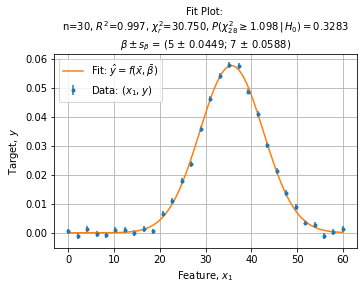

In [15]:
axe = model.plot_fit()
axe.figure.savefig("figures/NonLinear/RiceFit.pdf")

<Axes: title={'center': 'Fit Log-Loss Plot: \nn=30, $R^2$=0.997, $\\chi^2_r$=30.750, $P(\\chi^2_{28} \\geq 1.098 \\,|\\, H_0) = 0.3283$\n$\\beta \\pm s_{\\beta}$ = (5 ± 0.0449; 7 ± 0.0588)'}, xlabel='Parameter, $\\beta_{1}$', ylabel='Parameter, $\\beta_{2}$'>

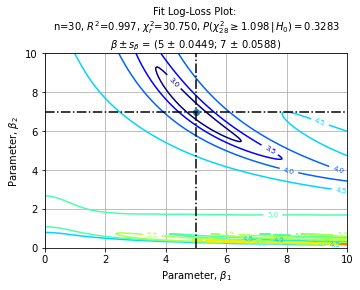

In [8]:
domains = pd.DataFrame({"min": [0, 0], "max": [10, 10]}).T
levels = list(np.arange(3, 8, 0.5))
model.plot_loss(domains=domains, levels=levels, log_loss=True, resolution=200)

<Axes: title={'center': 'Fit Log-Loss Plot: \nn=30, $R^2$=0.997, $\\chi^2_r$=30.750, $P(\\chi^2_{28} \\geq 1.098 \\,|\\, H_0) = 0.3283$\n$\\beta \\pm s_{\\beta}$ = (5 ± 0.0449; 7 ± 0.0588)'}, xlabel='Parameter, $\\beta_{1}$', ylabel='Parameter, $\\beta_{2}$'>

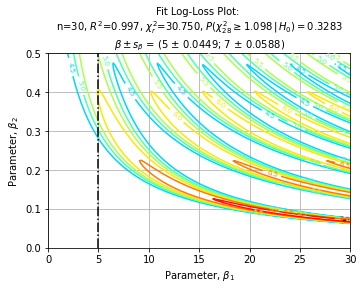

In [9]:
domains = pd.DataFrame({"min": [0, 0.], "max": [30, 0.5]}).T
model.plot_loss(domains=domains, levels=levels, log_loss=True, resolution=200)

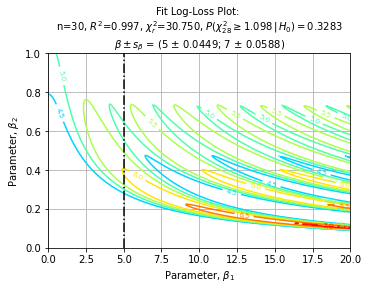

In [14]:
domains = pd.DataFrame({"min": [0, 0.], "max": [20, 1.]}).T
axe = model.plot_loss(domains=domains, levels=levels, log_loss=True, resolution=200)
axe.figure.savefig("figures/NonLinear/RiceLossZoom.pdf")

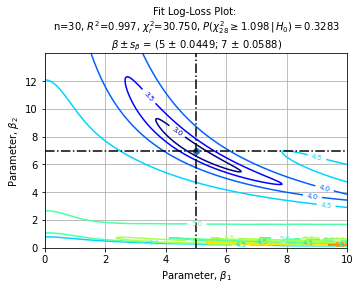

In [13]:
axe = model.plot_loss(factor=10, levels=levels, log_loss=True, resolution=200)
axe.figure.savefig("figures/NonLinear/RiceLoss.pdf")